In [4]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob

In [5]:
dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/"

load, save then manually change the coordinates, ONLY RUN ONCE!

In [3]:

#camp1 = ert.load(dir + '12Aug/p02_camp_along_shore_ws.dat')
#camp2 = ert.load(dir + '12Aug/p02_camp_perp_shore_ws.dat')
#camp3 = ert.load(dir + '12Aug/p02_camp_perp_pit_ws.dat')


#camp1.save(dir + '12Aug/p02_camp_along_shore_ws.txt', "a b m n err rhoa")
#camp2.save(dir + '12Aug/p02_camp_perp_shore_ws.txt', "a b m n err rhoa")
#camp3.save(dir + '12Aug/p02_camp_perp_pit_ws.txt', "a b m n err rhoa")

16/09/24 - 15:47:45 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
16/09/24 - 15:47:45 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
16/09/24 - 15:47:45 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [6]:

camp1 = ert.load(dir + '12Aug/p02_camp_along_shore_ws.txt')
camp2 = ert.load(dir + '12Aug/p02_camp_perp_shore_ws.txt')
camp3 = ert.load(dir + '12Aug/p02_camp_perp_pit_ws.txt')
parsons = [camp1, camp2, camp3]
#print(h1)
#ert.showData(h1)

In [7]:
def geom_error(data):
    # Set sensor positions
    #data.setSensorPositions(pg.meshtools.interpolateAlongCurve(pg.z(data), pg.x(data)))
    data.remove(data['rhoa'] < 0)
    data['k'] = ert.createGeometricFactors(data, numerical=True)
    mgr = ert.ERTManager(sr=False)
    k0 = ert.createGeometricFactors(data)
    data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
    ert.show(data, data['err']*100)


    return data, mgr, k0


17/09/24 - 09:49:41 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.


17/09/24 - 09:49:47 - pyGIMLi - INFO - Save RVector binary
17/09/24 - 09:49:47 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\2140531452819772402
17/09/24 - 09:49:47 - pyGIMLi - WARNING - Sensor z-coordinates not equal. Is there topography?
17/09/24 - 09:49:47 - pyGIMLi - INFO - Calculate analytical flat earth geometric factors.
17/09/24 - 09:49:47 - pyGIMLi - INFO - Save RVector binary
17/09/24 - 09:49:47 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3004834934777063145
17/09/24 - 09:49:48 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
17/09/24 - 09:49:52 - pyGIMLi - INFO - Save RVector binary
17/09/24 - 09:49:52 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\5223759085993180669
17/09/24 - 09:49:52 - pyGIMLi - WARNING - Sensor z-coordinates not equal. Is there topography?
17/09/24 - 09:49:52 - pyGIMLi - INFO - Calculate analytical flat earth geometric fac

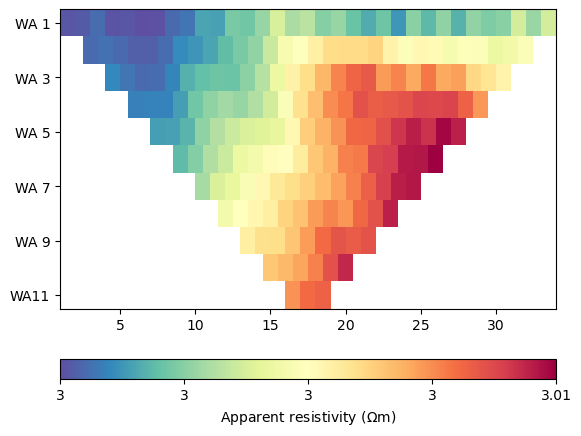

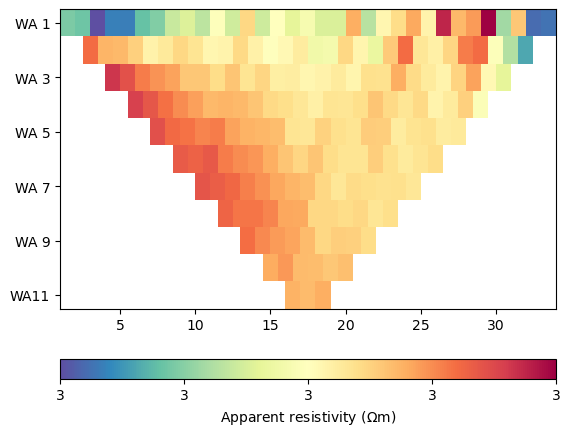

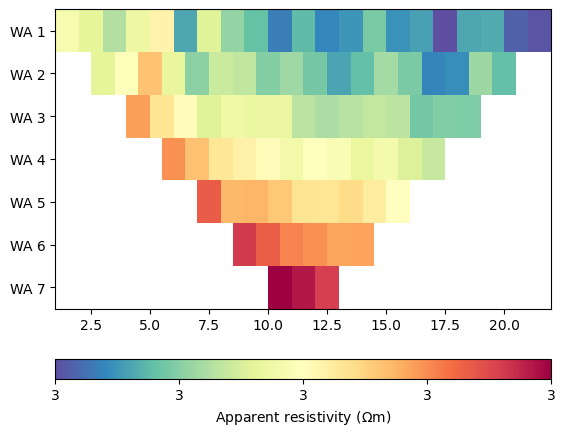

In [8]:

for item in parsons:
 geom_error(item)

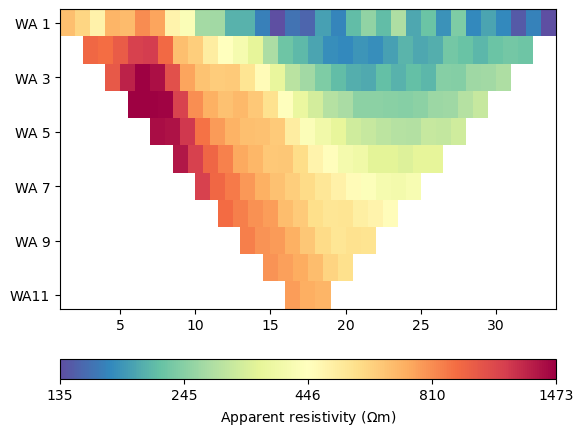

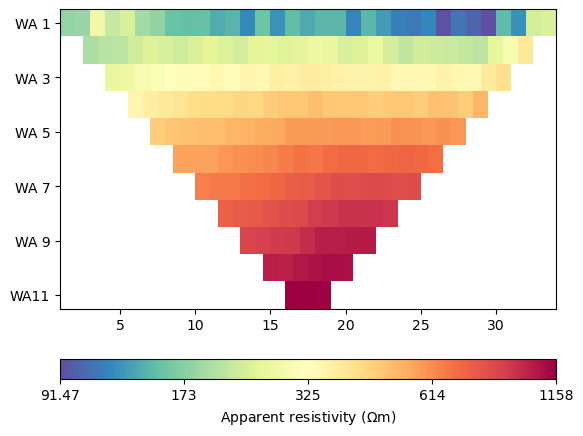

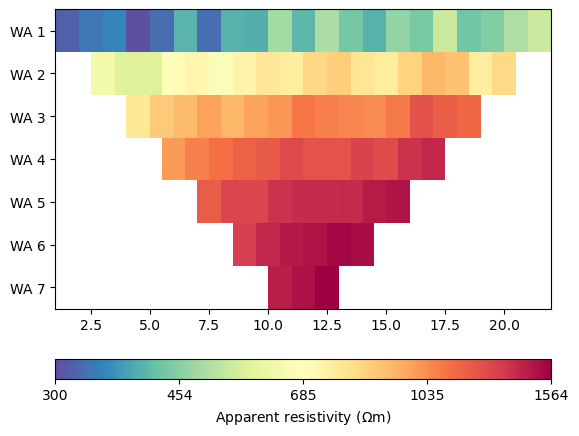

In [9]:
for item in parsons:
    ert.showData(item)
    

17/09/24 - 09:50:35 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 09:50:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


17/09/24 - 09:50:35 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 09:50:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 09:50:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/09/24 - 09:50:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/09/24 - 09:50:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1862 Cells: 3436 Boundaries: 2720
17/09/24 - 09:50:35 - pyGIMLi - INFO - Use median(data values)=404.525
17/09/24 - 09:50:35 - pyGIMLi - INFO - Created startmodel from forward operator: 643, min/max=404.525000/404.525000
17/09/24 - 09:50:35 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000228526C1800>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022852368680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002285106F920>
min/max (data): 135/1473
min/max (error): 3%/3.01%
min/max (start model): 405/405
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  443.51
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.47 (dPhi = 97.34%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.38 (dPhi = 43.81%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.32 (dPhi = 30.23%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.63 (dPhi = 54.37%) lam: 20

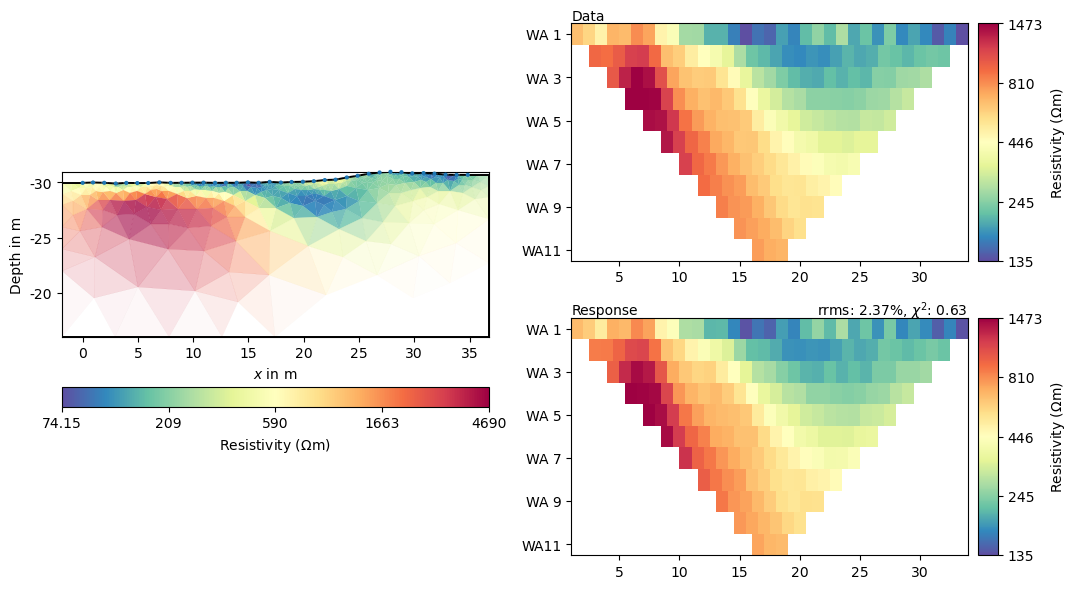

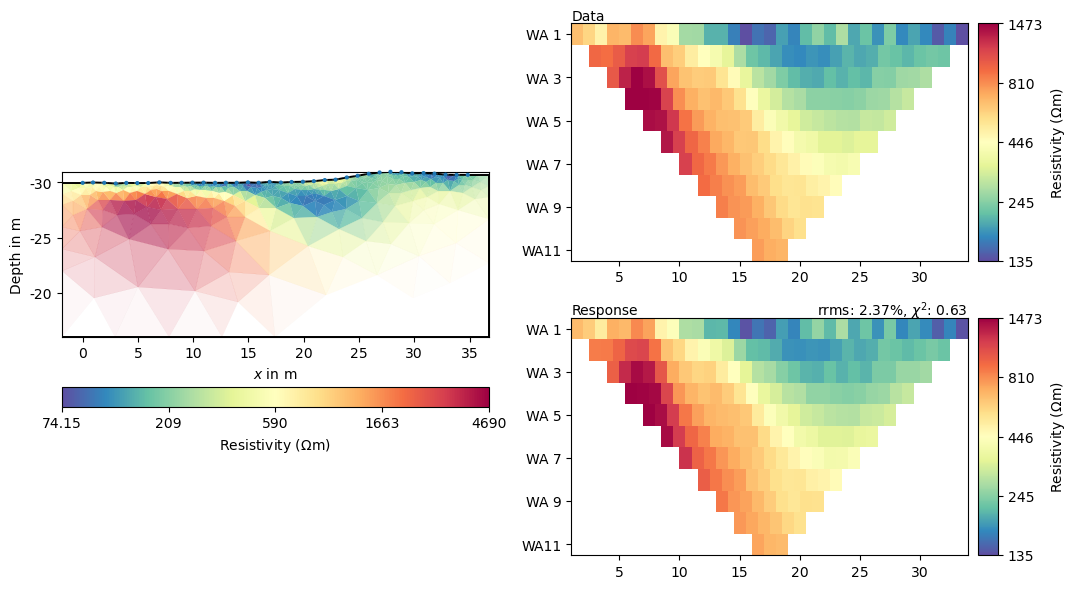

In [10]:
mgr = ert.ERTManager(item)
mgr.invert(parsons[0], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

17/09/24 - 09:52:03 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_camp1\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_camp1\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

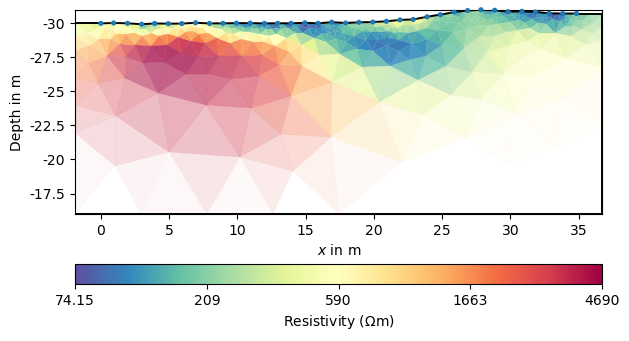

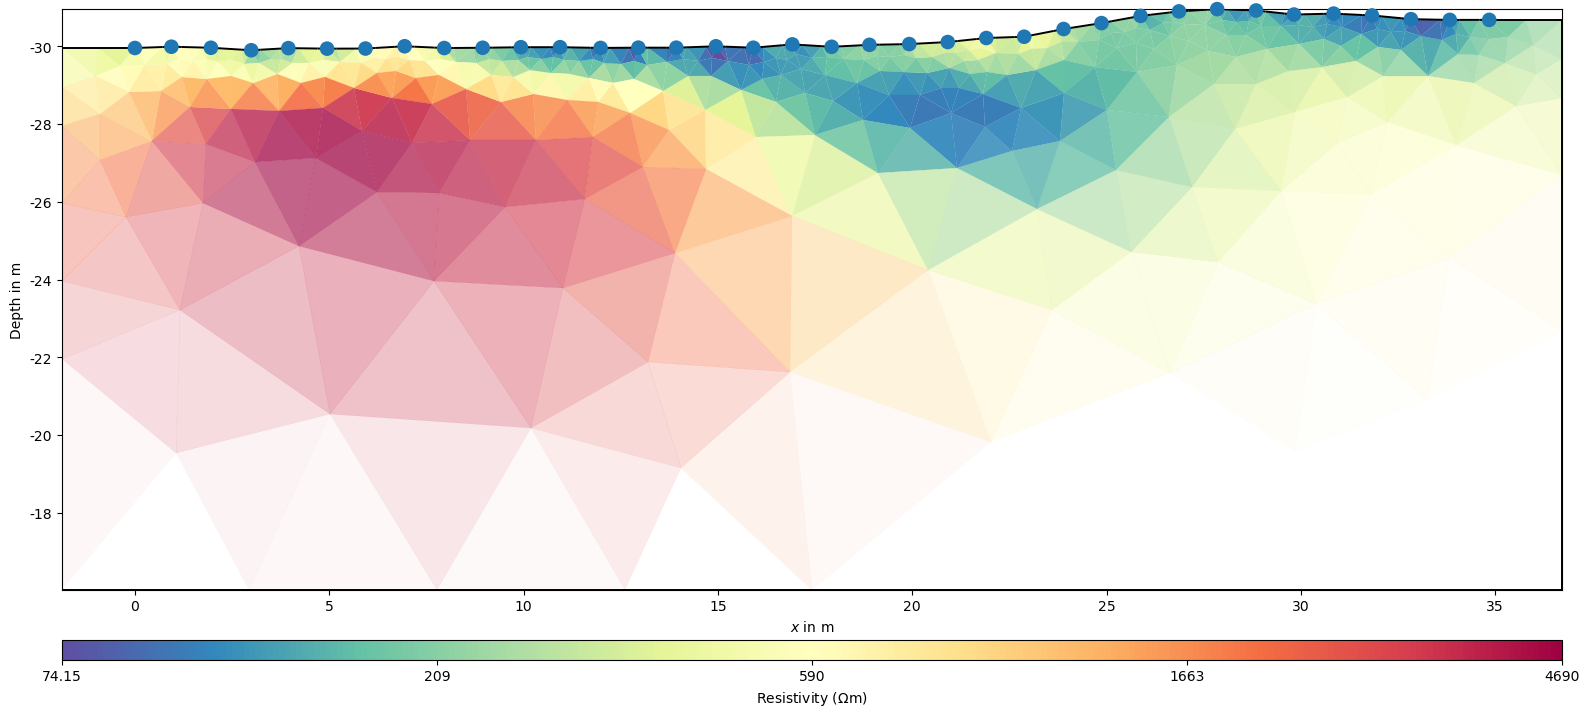

In [11]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/parsons_camp1')

17/09/24 - 09:52:33 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 09:52:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 09:52:33 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 09:52:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 09:52:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/09/24 - 09:52:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/09/24 - 09:52:33 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1900 Cells: 3516 Boundaries: 2778
17/09/24 - 09:52:33 - pyGIMLi - INFO - Use median(data values)=362.924
17/09/24 - 09:52:33 - pyGIMLi - INFO - Created startmodel from forward operator: 677, min/max=362.924000/362.924000
17/09/24 - 09:52:33 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000228508AD620>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000022849D53060>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000022852709000>
min/max (data): 91.47/1158
min/max (error): 3%/3%
min/max (start model): 363/363
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  539.98
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   59.85 (dPhi = 88.57%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   18.39 (dPhi = 65.80%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.99 (dPhi = 80.69%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 

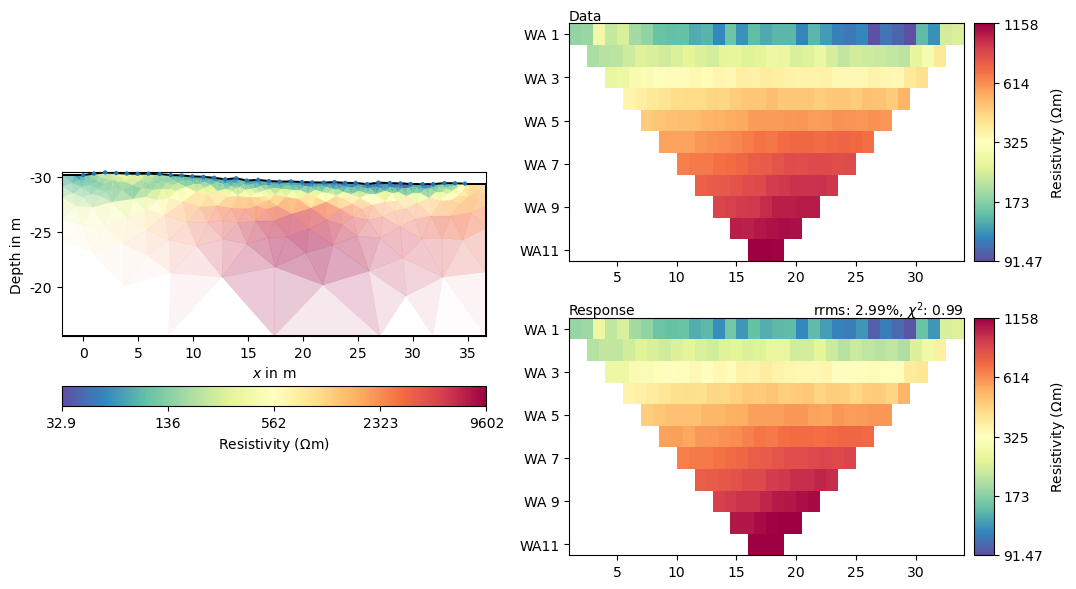

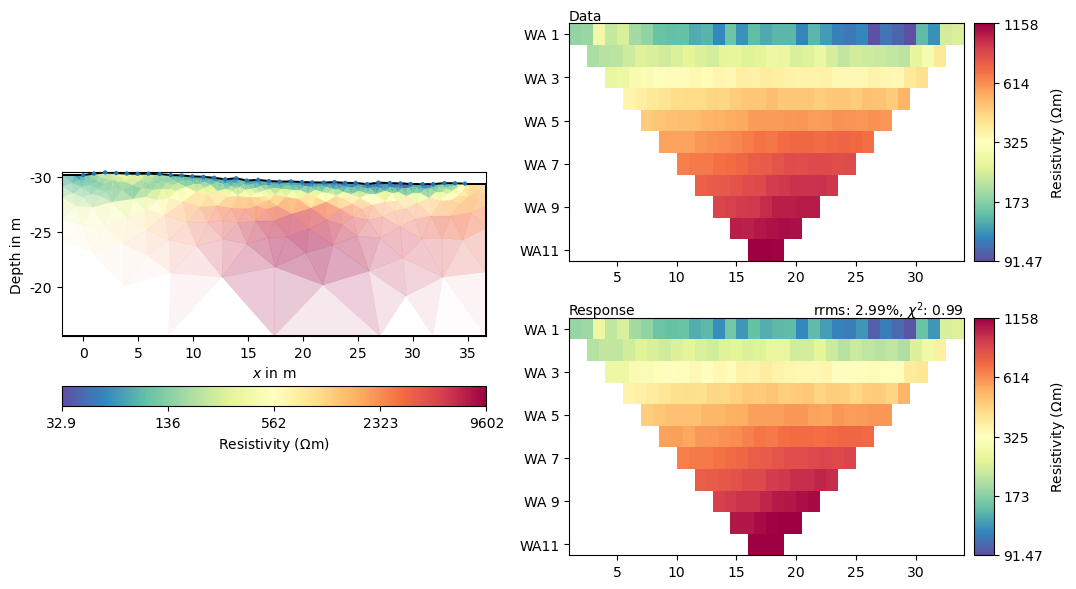

In [12]:
mgr = ert.ERTManager(item)
mgr.invert(parsons[1], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20, zWeight=0.5)
mgr.showResultAndFit()

17/09/24 - 09:53:10 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_camp2\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_camp2\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

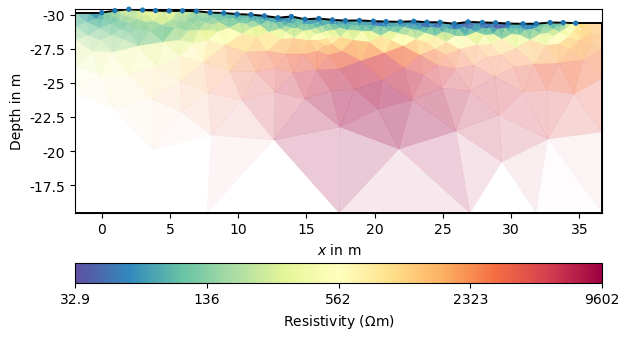

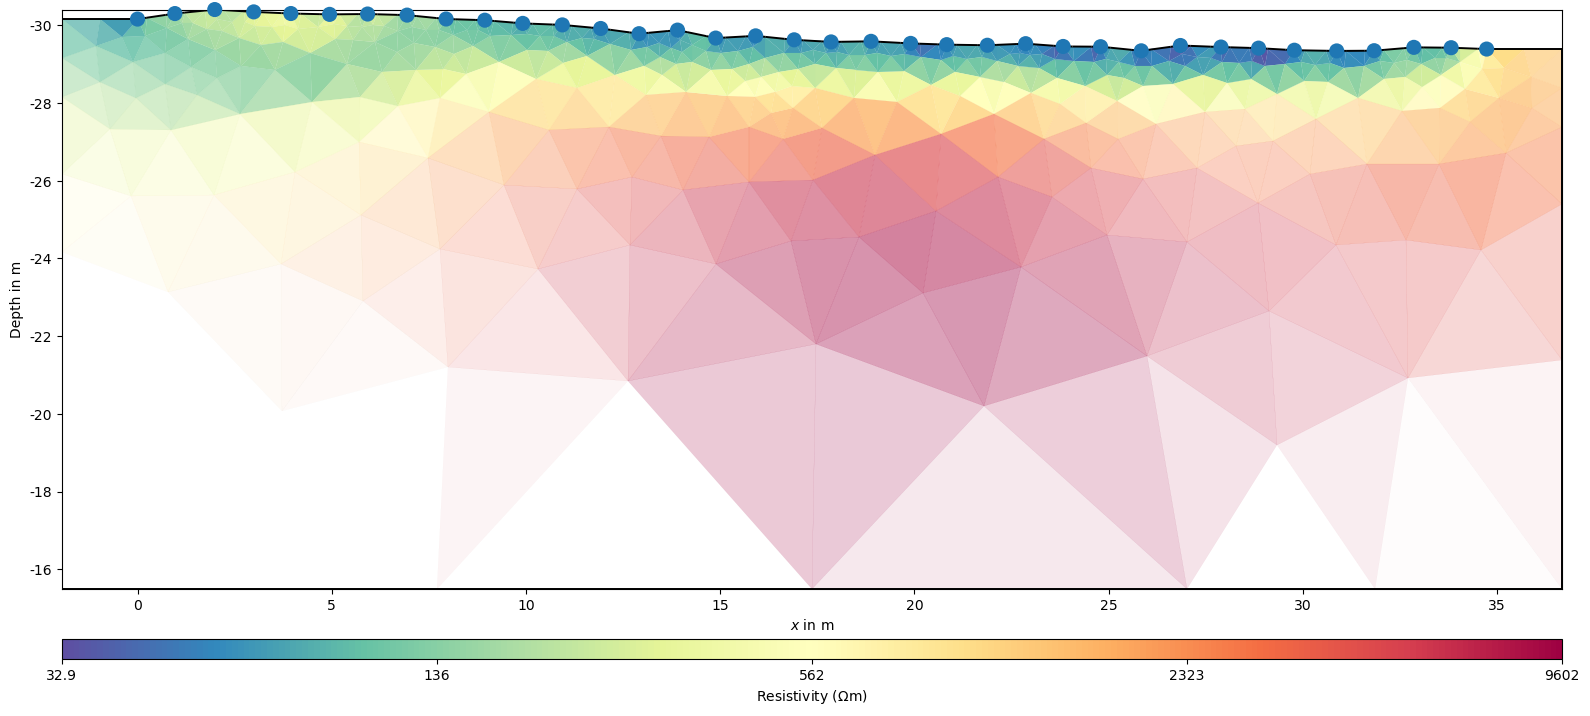

In [13]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/parsons_camp2')

17/09/24 - 09:53:21 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 09:53:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 09:53:21 - pyGIMLi - INFO - Found 2 regions.
17/09/24 - 09:53:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
17/09/24 - 09:53:21 - pyGIMLi - INFO - Creating forward mesh from region infos.


17/09/24 - 09:53:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
17/09/24 - 09:53:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1356 Cells: 2500 Boundaries: 1980
17/09/24 - 09:53:21 - pyGIMLi - INFO - Use median(data values)=772.659
17/09/24 - 09:53:21 - pyGIMLi - INFO - Created startmodel from forward operator: 446, min/max=772.659000/772.659000
17/09/24 - 09:53:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000022852434540>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002285F5A81D0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000022850CCEA20>
min/max (data): 300/1564
min/max (error): 3%/3%
min/max (start model): 773/773
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  305.93
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   27.11 (dPhi = 89.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.44 (dPhi = 65.76%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.57 (dPhi = 1.50%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.5 (< 2.0%)              

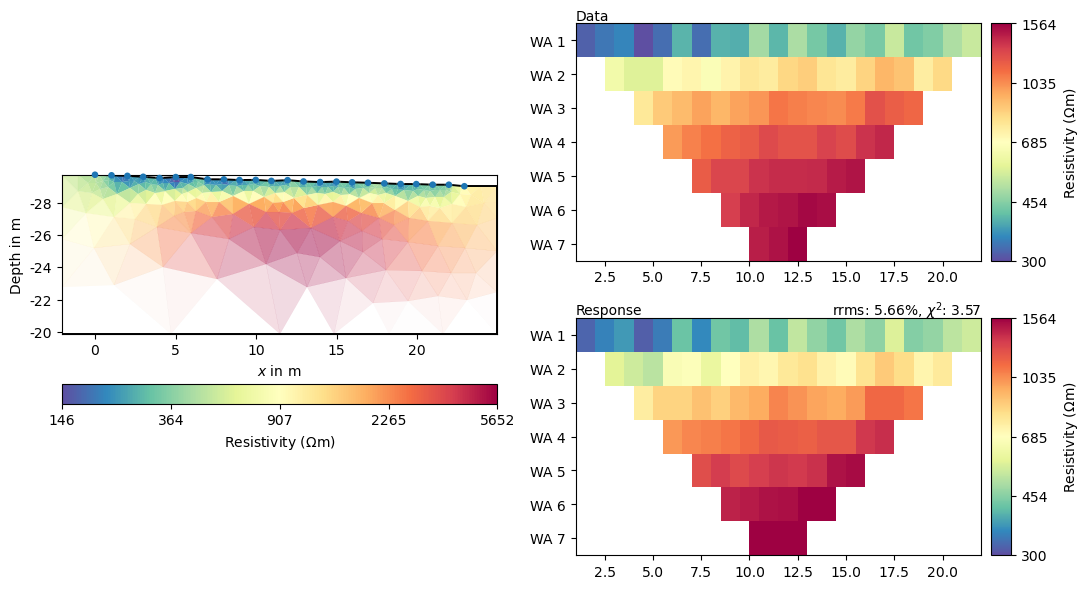

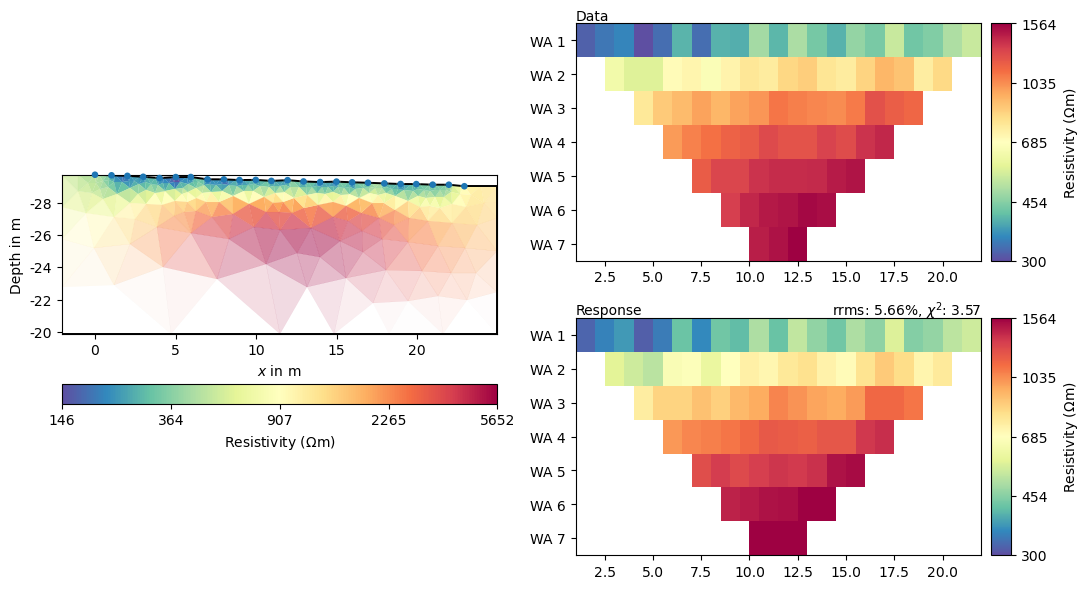

In [14]:
mgr = ert.ERTManager(item)
mgr.invert(parsons[2], verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)
mgr.showResultAndFit()

17/09/24 - 09:53:46 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_camp3\ERTManager


('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2024/all_inversions/parsons_camp3\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

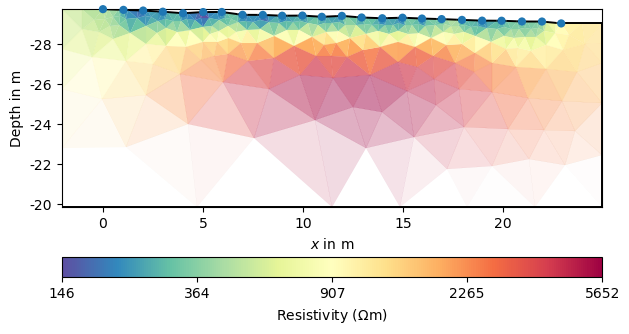

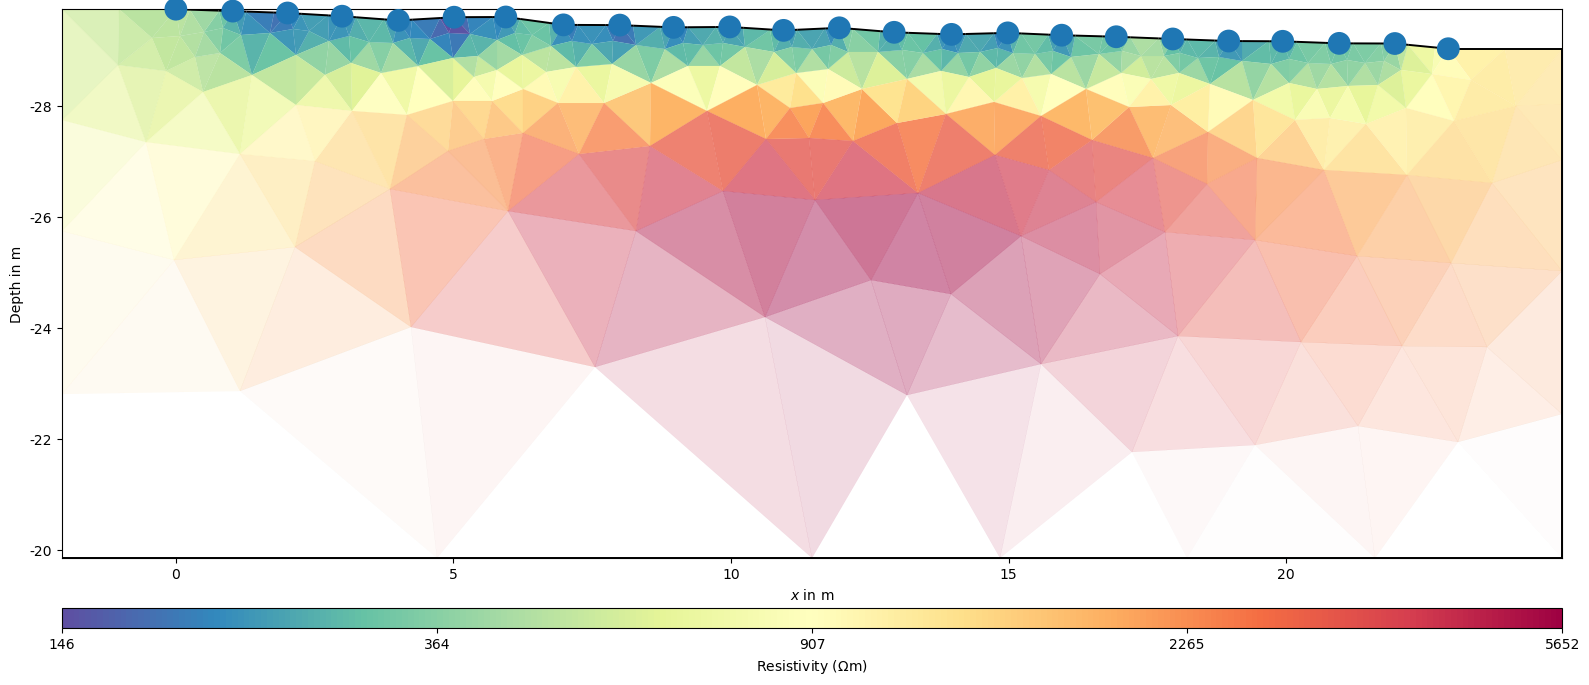

In [15]:
mgr.showResult()
mgr.saveResult(dir+ 'all_inversions/parsons_camp3')

In [17]:
mesh_c1 = pg.load(dir+'all_inversions/parsons_camp1/ERTManager/resistivity-pd.bms')
res_c1 = pg.load(dir+'all_inversions/parsons_camp1/ERTManager/resistivity.vector')
cov_c1 = pg.load(dir+'all_inversions/parsons_camp1/ERTManager/resistivity-cov.vector')

mesh_c2 = pg.load(dir+'all_inversions/parsons_camp2/ERTManager/resistivity-pd.bms')
res_c2 = pg.load(dir+'all_inversions/parsons_camp2/ERTManager/resistivity.vector')
cov_c2 = pg.load(dir+'all_inversions/parsons_camp2/ERTManager/resistivity-cov.vector')

mesh_c3 = pg.load(dir+'all_inversions/parsons_camp3/ERTManager/resistivity-pd.bms')
res_c3 = pg.load(dir+'all_inversions/parsons_camp3/ERTManager/resistivity.vector')
cov_c3 = pg.load(dir+'all_inversions/parsons_camp3/ERTManager/resistivity-cov.vector')




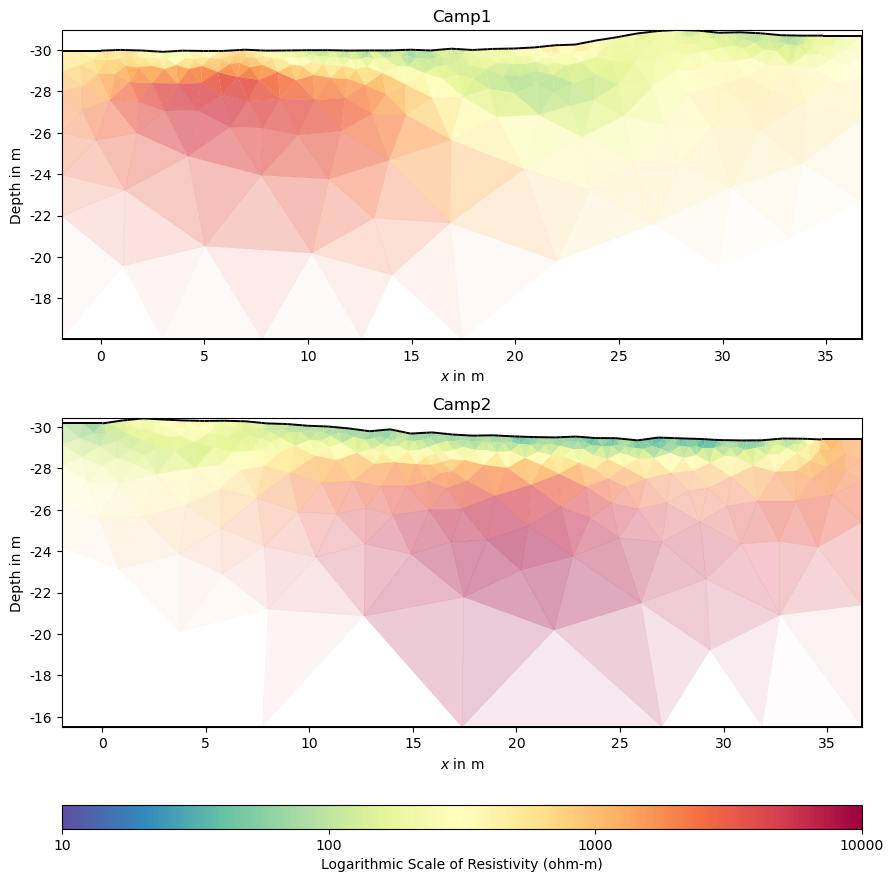

In [22]:
from matplotlib.ticker import LogLocator, LogFormatter



fig, ax = plt.subplots(2, 1, figsize=(10, 12))  
#fig, ax = plt.subplots(1, 2, figsize=(10, 10))

pg.show(mesh_c1, res_c1, logScale=True, cMap="Spectral_r", ax=ax[0], colorBar=False, cMin=10, cMax=10000, coverage=cov_c1, sharex=True)
pg.show(mesh_c2, res_c2, logScale=True, cMap="Spectral_r", ax=ax[1], colorBar=False, cMin=10, cMax=10000, coverage=cov_c2, sharex=True)


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15, top=0.9, wspace=0.5) 


cax = fig.add_axes([0.1, 0.15, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=10, cMax=10000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

ax[0].set_title('Camp1')
ax[1].set_title('Camp2')






plt.show()